In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [47]:
dftest=pd.read_excel('test_agriculture.xlsx')
dftrain=pd.read_excel('train_agriculture.xlsx')

In [110]:
dftrain["source"]="dftrain"
dftest["source"]="dftest"
#dftest['Crop_Damage']=0
df=pd.concat([dftrain,dftest],ignore_index=True)
dftest.shape,dftrain.shape,df.shape

((1199, 11), (4599, 11), (5798, 11))

In [49]:
dftrain['Crop_Damage'].shape

(4599,)

In [50]:
df['Crop_Damage'].shape

(5798,)

In [51]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
source                        0
dtype: int64

In [52]:
dftrain

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.0,0,1,0,dftrain
1,F00000003,209,1,0,1,0,0.0,0,2,1,dftrain
2,F00000004,257,1,0,1,0,0.0,0,2,1,dftrain
3,F00000005,257,1,1,1,0,0.0,0,2,1,dftrain
4,F00000006,342,1,0,1,0,0.0,0,2,1,dftrain
...,...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1,dftrain
4595,F00008079,2139,0,1,2,30,47.0,2,1,1,dftrain
4596,F00008080,2267,0,1,2,10,7.0,27,2,0,dftrain
4597,F00008082,2267,0,1,2,10,20.0,24,2,0,dftrain


In [53]:
dftest

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,source
0,F00000002,188,1,1,1,0,NaN,0,2,dftest
1,F00000007,410,1,1,1,0,0.0,0,2,dftest
2,F00000011,626,1,0,1,0,0.0,0,2,dftest
3,F00000013,731,1,0,1,0,0.0,0,2,dftest
4,F00000014,789,0,0,1,0,0.0,0,1,dftest
...,...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3,dftest
1195,F00003135,1132,0,1,2,40,25.0,3,1,dftest
1196,F00003138,1132,0,1,2,20,13.0,23,1,dftest
1197,F00003149,1212,0,1,2,10,35.0,5,1,dftest


In [54]:
#we already know that we have to predict the Crop_damage
#i.e. whether the crop would be healthy (alive)=0, damaged by pesticides=2 , damaged by other reasons=1.

In [55]:
#so lets start working on actual whole data 'df'

In [56]:
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.0,0,1,0.0,dftrain
1,F00000003,209,1,0,1,0,0.0,0,2,1.0,dftrain
2,F00000004,257,1,0,1,0,0.0,0,2,1.0,dftrain
3,F00000005,257,1,1,1,0,0.0,0,2,1.0,dftrain
4,F00000006,342,1,0,1,0,0.0,0,2,1.0,dftrain
...,...,...,...,...,...,...,...,...,...,...,...
5793,F00003133,1132,0,1,2,40,34.0,7,3,NaN,dftest
5794,F00003135,1132,0,1,2,40,25.0,3,1,NaN,dftest
5795,F00003138,1132,0,1,2,20,13.0,23,1,NaN,dftest
5796,F00003149,1212,0,1,2,10,35.0,5,1,NaN,dftest


In [57]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5237.000000,5798.000000,5798.000000,4599.000000
mean,1347.643153,0.218524,0.472232,2.304243,26.493618,28.920374,8.760262,1.891687,0.194390
std,821.330403,0.413280,0.499271,0.484594,15.655508,12.625594,9.582781,0.692997,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,28.000000,6.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,15.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [58]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                float64
source                      object
dtype: object

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5798 non-null   object 
 1   Estimated_Insects_Count  5798 non-null   int64  
 2   Crop_Type                5798 non-null   int64  
 3   Soil_Type                5798 non-null   int64  
 4   Pesticide_Use_Category   5798 non-null   int64  
 5   Number_Doses_Week        5798 non-null   int64  
 6   Number_Weeks_Used        5237 non-null   float64
 7   Number_Weeks_Quit        5798 non-null   int64  
 8   Season                   5798 non-null   int64  
 9   Crop_Damage              4599 non-null   float64
 10  source                   5798 non-null   object 
dtypes: float64(2), int64(7), object(2)
memory usage: 498.4+ KB


In [60]:
#dtypes: float64(1), int64(8), object(2)

In [61]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
source                        0
dtype: int64

In [131]:
#Lets drop useless column

df.drop('ID',axis=1,inplace=True)


In [64]:
df.head(10)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,188,1,0,1,0,0.0,0,1,0.0,dftrain
1,209,1,0,1,0,0.0,0,2,1.0,dftrain
2,257,1,0,1,0,0.0,0,2,1.0,dftrain
3,257,1,1,1,0,0.0,0,2,1.0,dftrain
4,342,1,0,1,0,0.0,0,2,1.0,dftrain
5,448,0,1,1,0,NaN,0,2,1.0,dftrain
6,448,0,1,1,0,NaN,0,2,1.0,dftrain
7,577,1,0,1,0,0.0,0,1,2.0,dftrain
8,731,0,0,1,0,0.0,0,2,0.0,dftrain
9,1132,1,0,1,0,0.0,0,1,2.0,dftrain


In [65]:
#filling null data in Number_Weeks_Used

In [69]:
df['Number_Weeks_Used'].unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65.])

In [140]:
df['Number_Weeks_Used']=df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean())

In [141]:
df.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [72]:
df['Crop_Damage'].value_counts()

0.0    3820
1.0     664
2.0     115
Name: Crop_Damage, dtype: int64

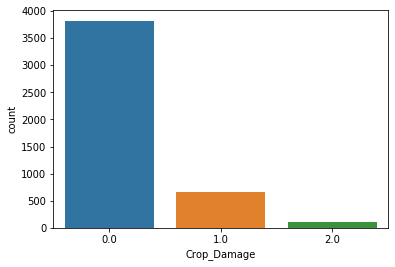

In [73]:
sns.countplot(df['Crop_Damage'])

In [74]:
#so it is an imbalanced dataset

In [75]:
#using smote may be neccesary

In [76]:
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.024004,-0.190848,-0.015056,-0.122206,0.441158,0.228822,-0.002287,0.202312
Crop_Type,-0.024004,1.000000,-0.127340,0.373412,-0.164966,0.010653,-0.290973,0.003754,0.021772
Soil_Type,-0.190848,-0.127340,1.000000,0.044193,0.051543,-0.103188,-0.062686,-0.005204,-0.059481
Pesticide_Use_Category,-0.015056,0.373412,0.044193,1.000000,-0.006929,0.375475,-0.574041,0.009279,0.199195
Number_Doses_Week,-0.122206,-0.164966,0.051543,-0.006929,1.000000,0.104705,-0.024209,0.002751,-0.018363
Number_Weeks_Used,0.441158,0.010653,-0.103188,0.375475,0.104705,1.000000,-0.428203,-0.004652,0.231939
Number_Weeks_Quit,0.228822,-0.290973,-0.062686,-0.574041,-0.024209,-0.428203,1.000000,0.010324,-0.152918
Season,-0.002287,0.003754,-0.005204,0.009279,0.002751,-0.004652,0.010324,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231939,-0.152918,-0.016196,1.000000


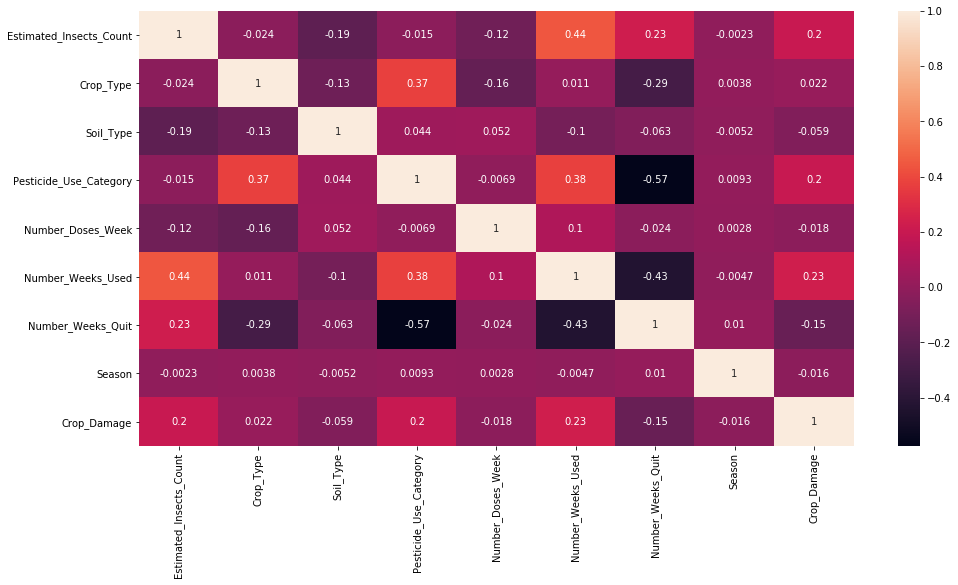

In [77]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

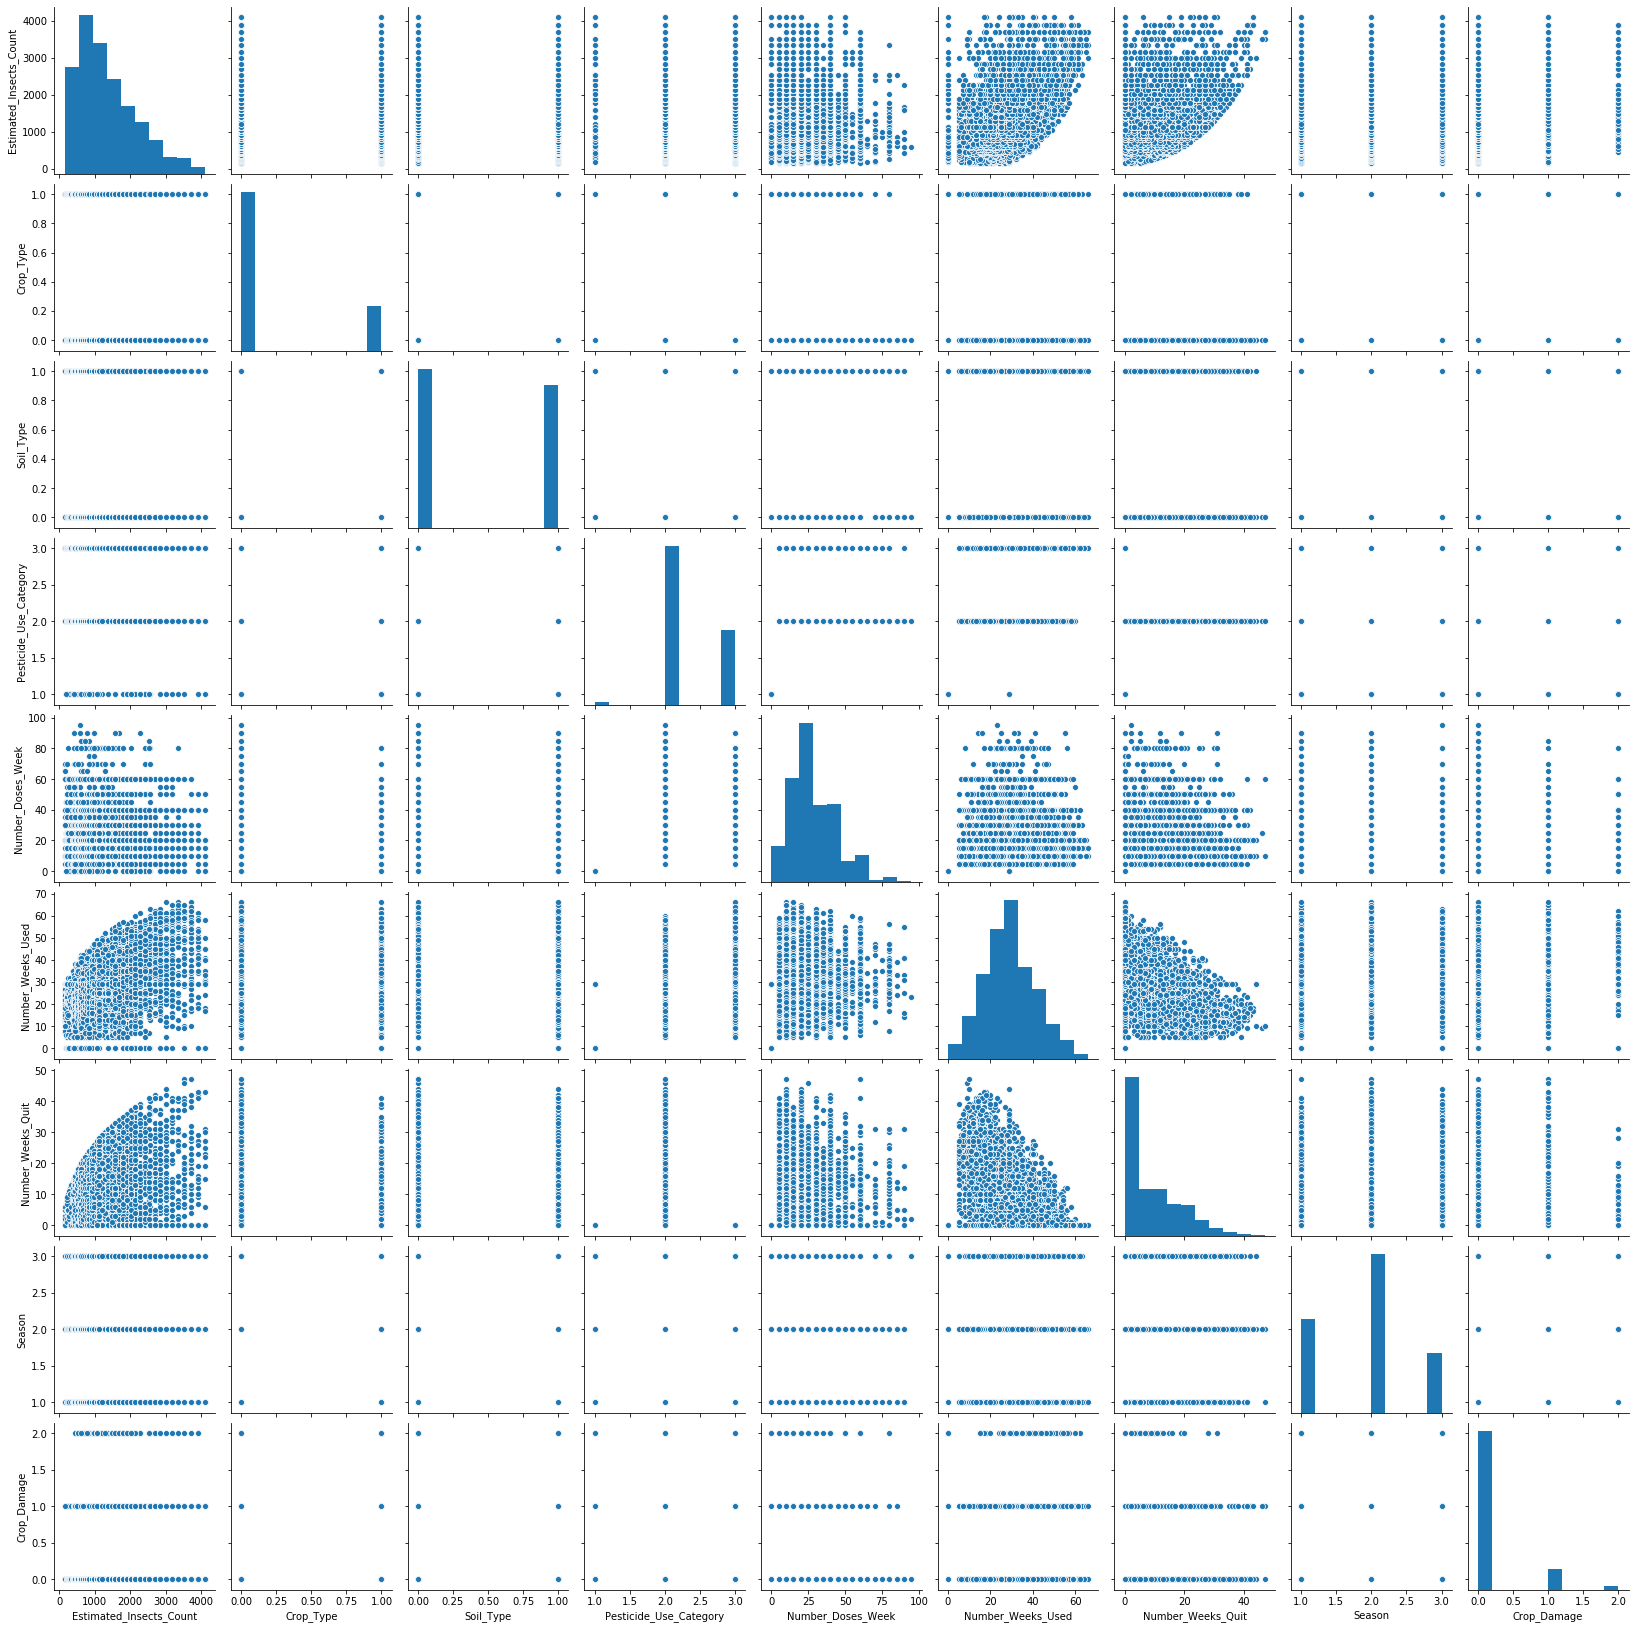

In [188]:
sns.pairplot(df)

In [93]:
#Lets drop the Item_Outlet_Sales from test dataset as that is the o/p variable that needs to be predicted
#dftest.drop(columns=["Crop_Damage"],inplace=True)

In [ ]:
df.drop('source',axis=1,inplace=True)


In [112]:
#lets drop source column from df_train and df_test
dftrain.drop(columns=["source"],inplace=True)
dftest.drop(columns=["source"],inplace=True)

In [157]:
#lets divide input and output
df_x=df.drop(columns=["Crop_Damage"])
y=df["Crop_Damage"]

In [158]:
df_x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,0,1,0,0.000000,0,1
1,209,1,0,1,0,0.000000,0,2
2,257,1,0,1,0,0.000000,0,2
3,257,1,1,1,0,0.000000,0,2
4,342,1,0,1,0,0.000000,0,2
...,...,...,...,...,...,...,...,...
5793,1132,0,1,2,40,34.000000,7,3
5794,1132,0,1,2,40,25.000000,3,1
5795,1132,0,1,2,20,13.000000,23,1
5796,1212,0,1,2,10,35.000000,5,1


In [159]:
#let's bring the features to same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [160]:
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-1.412030,1.891075,-0.945923,-2.691647,-1.692433,-2.410413,-0.914246,-1.286822
1,-1.386460,1.891075,-0.945923,-2.691647,-1.692433,-2.410413,-0.914246,0.156310
2,-1.328013,1.891075,-0.945923,-2.691647,-1.692433,-2.410413,-0.914246,0.156310
3,-1.328013,1.891075,1.057168,-2.691647,-1.692433,-2.410413,-0.914246,0.156310
4,-1.224513,1.891075,-0.945923,-2.691647,-1.692433,-2.410413,-0.914246,0.156310
...,...,...,...,...,...,...,...,...
5793,-0.262576,-0.528800,1.057168,-0.627885,0.862798,0.423369,-0.183706,1.599442
5794,-0.262576,-0.528800,1.057168,-0.627885,0.862798,-0.326750,-0.601157,-1.286822
5795,-0.262576,-0.528800,1.057168,-0.627885,-0.414817,-1.326908,1.486099,-1.286822
5796,-0.165165,-0.528800,1.057168,-0.627885,-1.053625,0.506716,-0.392432,-1.286822


In [161]:
y

0       0
1       1
2       1
3       1
4       1
       ..
5793    0
5794    0
5795    0
5796    0
5797    0
Name: Crop_Damage, Length: 5798, dtype: int64

In [179]:
y.unique()

array([0, 1, 2], dtype=int64)

In [167]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [181]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.8560344827586207
[[989   4   0]
 [138   4   0]
 [ 25   0   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       993
           1       0.50      0.03      0.05       142
           2       0.00      0.00      0.00        25

    accuracy                           0.86      1160
   macro avg       0.45      0.34      0.33      1160
weighted avg       0.80      0.86      0.80      1160



Accuracy score of SVC() is:
0.8586206896551725
[[992   1   0]
 [138   4   0]
 [ 24   1   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       993
           1       0.67      0.03      0.05       142
           2       0.00      0.00      0.00        25

    accuracy                           0.86      1160
   macro avg       0.51      0.34      0.33      1160
weighted avg       0.82      0.86      0.80      1160



Accuracy score of DecisionTreeCla

In [182]:
#Lets use SVM
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
svc1=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc1, parameters, cv=5,scoring="accuracy")
clf.fit(x,y)
clf.best_params_

{'C': 0.001, 'kernel': 'linear'}

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 42,test_size=0.20,stratify=y)
svc=SVC(kernel="linear",C=0.001)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [185]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred,average='micro'))
print("classification report \n",classification_report(y_test,y_pred))
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Confusion matrix 
 [[1004    0    0]
 [ 133    0    0]
 [  23    0    0]]
f1 score is :  0.8655172413793104
classification report 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      1004
           1       0.00      0.00      0.00       133
           2       0.00      0.00      0.00        23

    accuracy                           0.87      1160
   macro avg       0.29      0.33      0.31      1160
weighted avg       0.75      0.87      0.80      1160

Accuracy score:  0.8655172413793103


In [187]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svc,x,y,cv=5,scoring="accuracy").mean())

0.865643390556663


In [190]:
import joblib
joblib.dump(svc,'agriculture.obj')

['agriculture.obj']